In [23]:
from IPython.core.display import display
from PIL import Image as Img
import random
import numpy as np

In [24]:
image_width = 250#416
image_height = 250#416

test_image = r'.\VOCdevkit\VOC2007\JPEGImages\000019.jpg'

In [131]:
def read_image(path):
    im = Img.open(path).resize((image_width, image_height))
    im = np.array(im, dtype = np.float32)
    return im

    
def normalize(imagearr):
    imagearr = np.where(imagearr >= 0, imagearr, 0)
    imagearr = np.where(imagearr <= 255, imagearr, 255)
    
    return imagearr

def display_image(imagearr):
    imagearr = normalize(imagearr)    
    imagearr = imagearr.astype(np.uint8)
    img = Img.fromarray(imagearr, 'RGB')
    display(img)


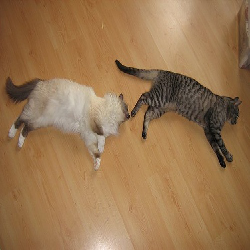

In [132]:
image = read_image(test_image)
display_image(image)

-12.426234783589226


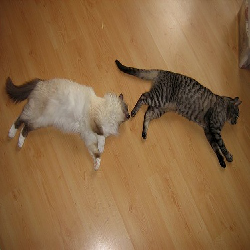

In [133]:
def change_brightness_slightly(im, range_):
    value = random.uniform(range_[0], range_[1])
    print(value)
    im += value
    return im

image = read_image(test_image)
image = change_brightness_slightly(image, (-30, 30))
display_image(image)

1.2988239402827126


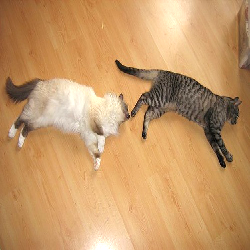

In [135]:
def change_brightness_not_so_slightly(im, range_):
    value = random.uniform(range_[0], range_[1])
    print(value)
    im *= value
    return im

image = read_image(test_image)

image = change_brightness_not_so_slightly(image, (0.5, 1.5))
display_image(image)